# Import libraries and Dataset

In [119]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.model_selection import GridSearchCV

import pickle

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('synthetic_health_data.csv')
df

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


# Exploratory Data Analysis (EDA)

## Check Columns and Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


In [10]:
df.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


## Distribution of each columns

<Figure size 400x200 with 0 Axes>

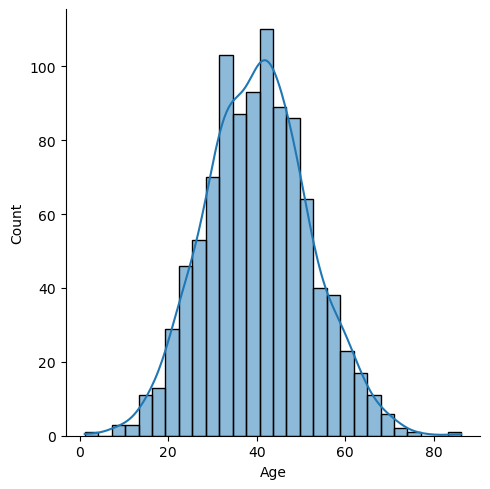

<Figure size 400x200 with 0 Axes>

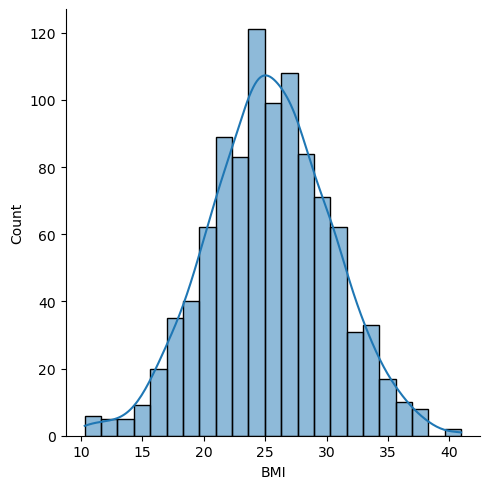

<Figure size 400x200 with 0 Axes>

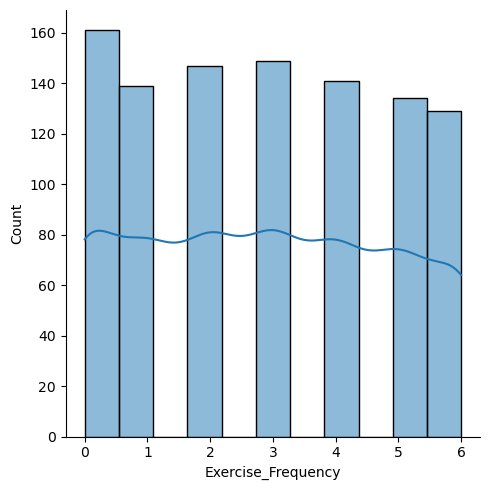

<Figure size 400x200 with 0 Axes>

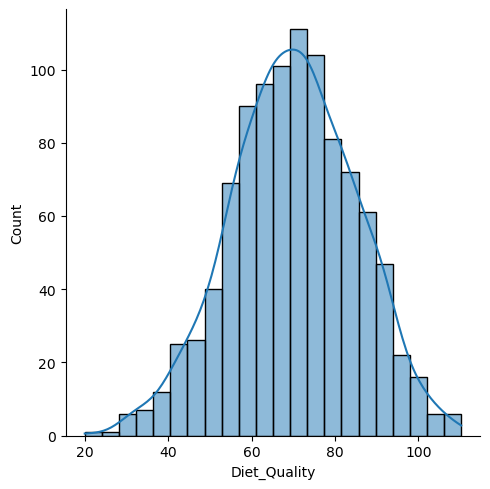

<Figure size 400x200 with 0 Axes>

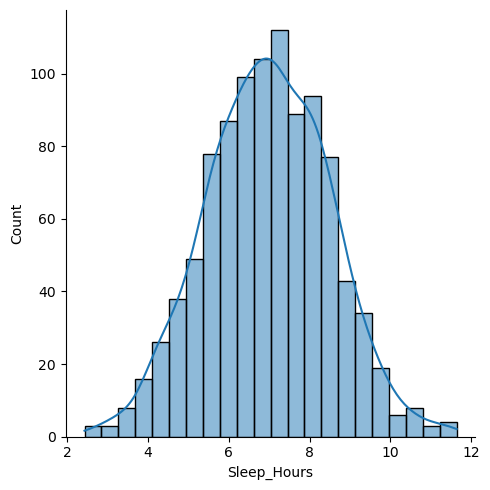

<Figure size 400x200 with 0 Axes>

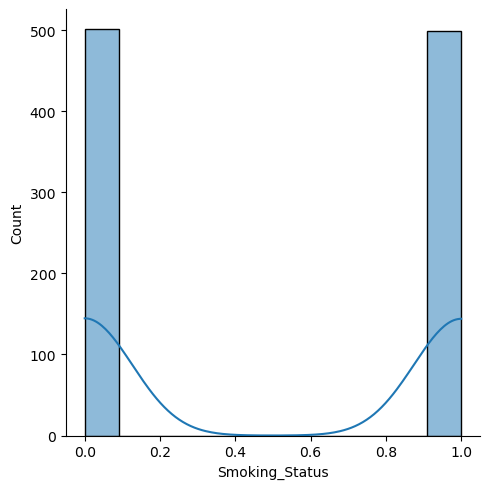

<Figure size 400x200 with 0 Axes>

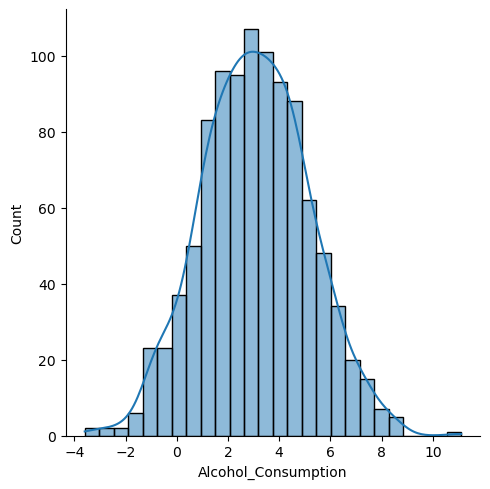

<Figure size 400x200 with 0 Axes>

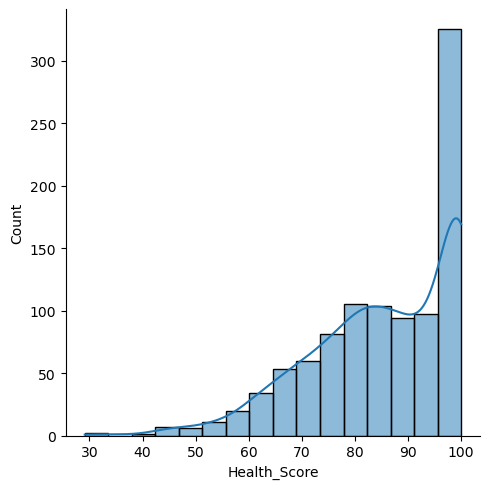

In [14]:
for col in df.columns.to_list():
    plt.figure(figsize = (4,2))
    sns.displot(data = df, x = col, kde = True)
    plt.show()

## Correlation between each columns

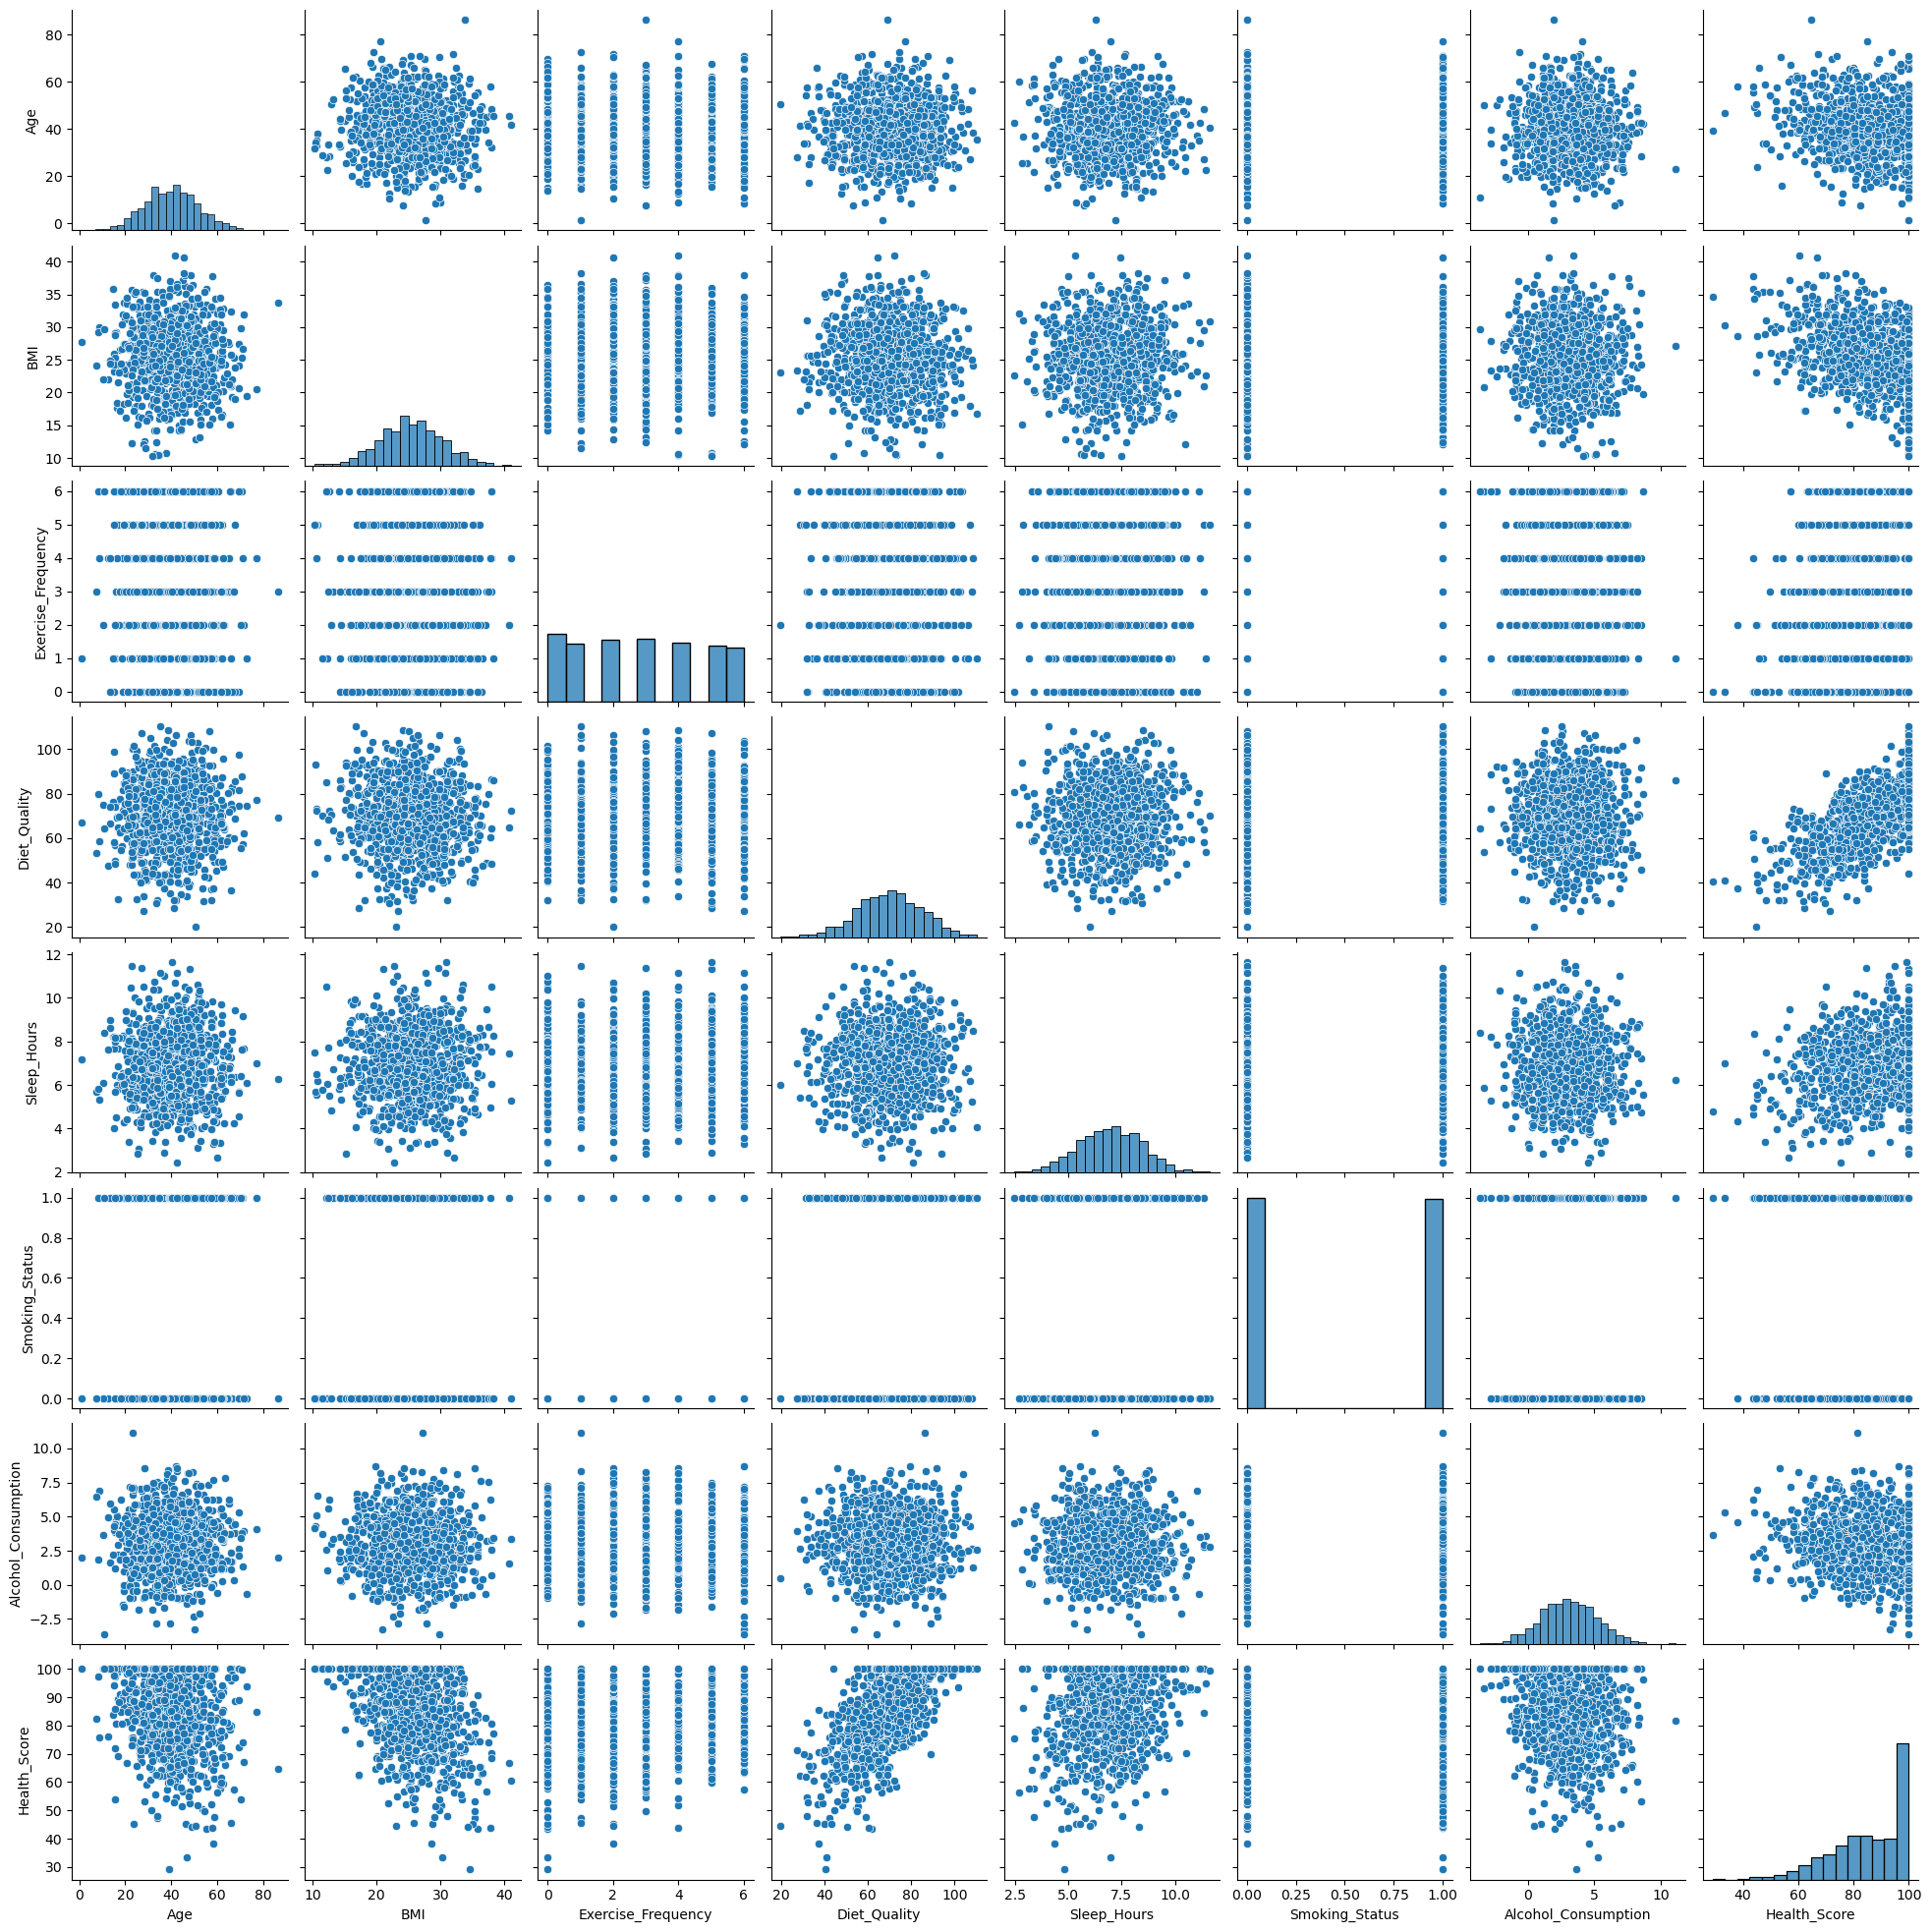

In [16]:
sns.pairplot(df)
plt.show()

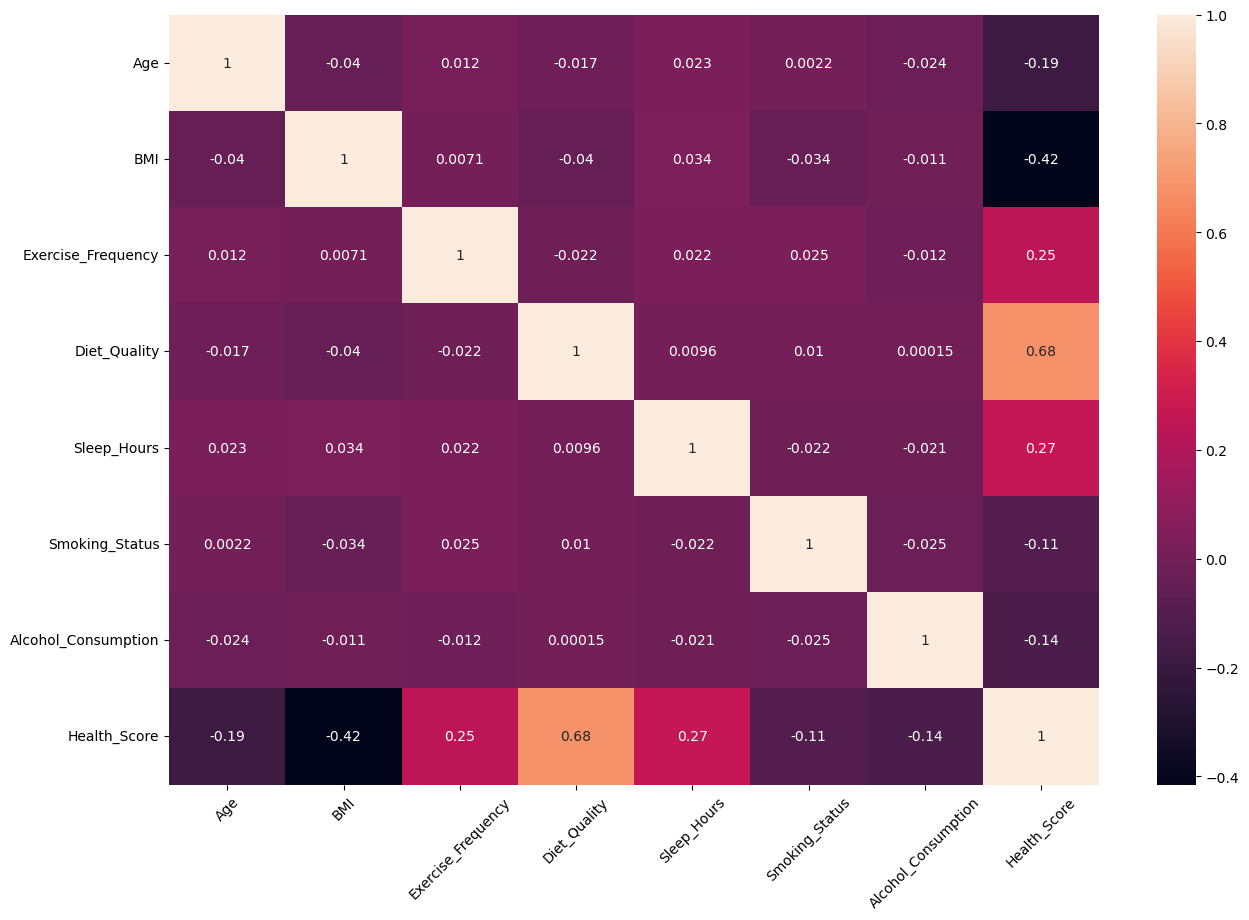

In [18]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True)
plt.xticks(rotation=45)
plt.show()

## Outlier

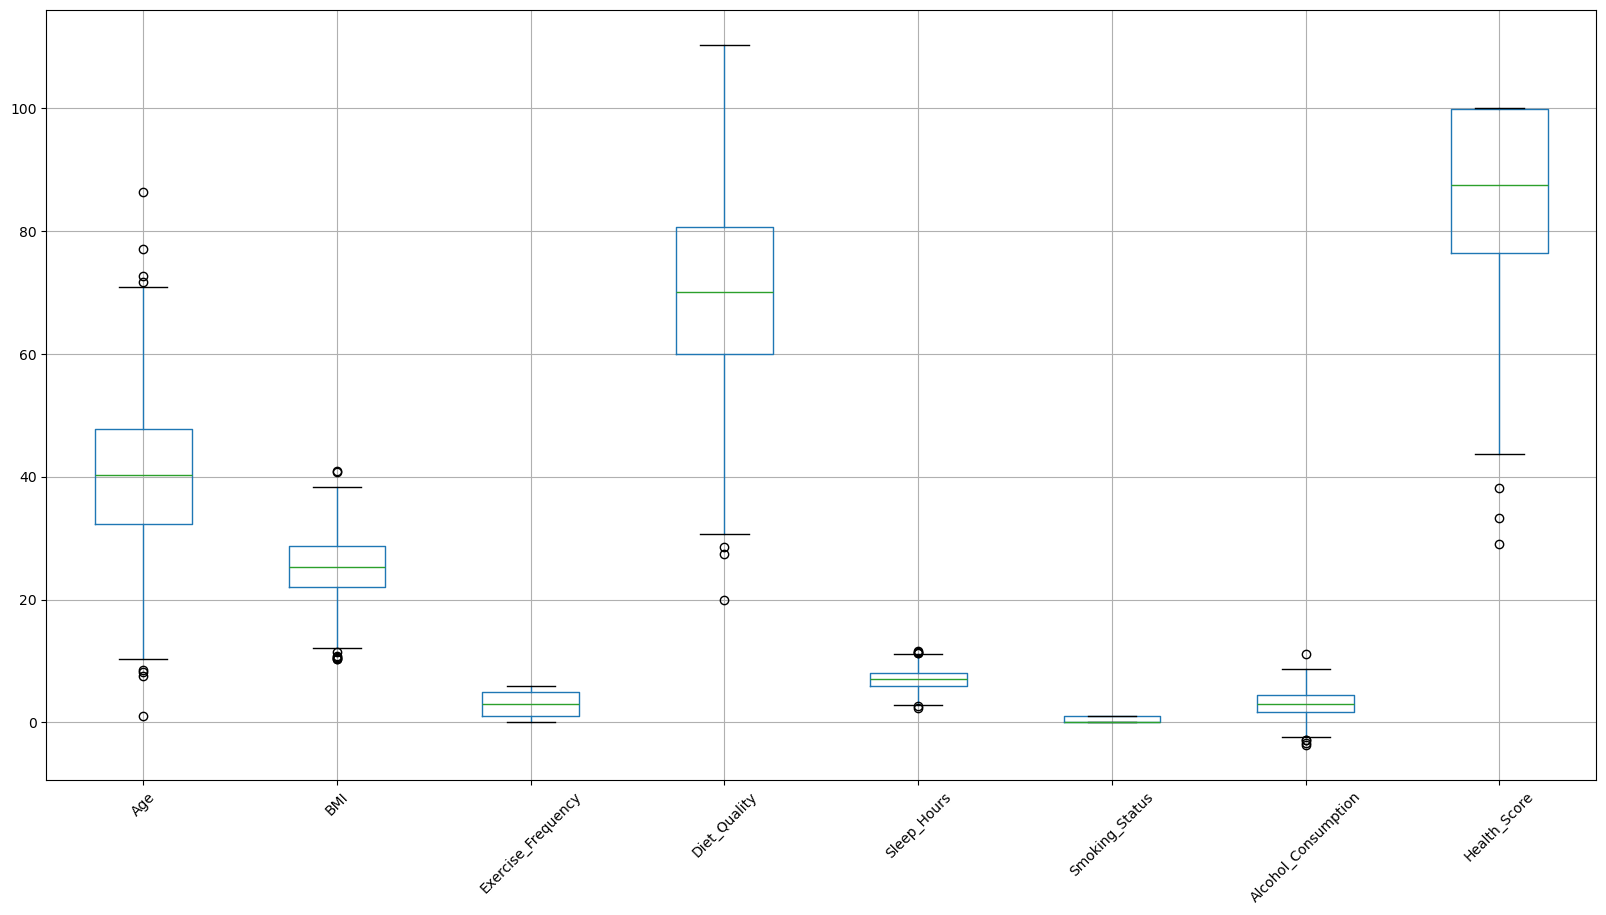

In [20]:
df.boxplot(figsize=(20, 10))
plt.xticks(rotation=45)
plt.show()

# Data Pre-processing

In [27]:
df.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.231985,25.354181,2.888000,69.952977,6.973135,0.499000,3.079377,85.479947
std,11.750591,4.987272,1.995354,14.972061,1.517218,0.500249,2.084564,13.633845
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.228916,21.968792,1.000000,59.945481,5.903351,0.000000,1.644111,76.430819
50%,40.303607,25.315386,3.000000,69.975151,6.990847,0.000000,3.064261,87.498996
75%,47.775327,28.644411,5.000000,80.527839,8.054595,1.000000,4.489293,99.762644
max,86.232778,40.965538,6.000000,110.265186,11.638962,1.000000,11.105100,100.000000


In [29]:
df_cp = df.copy()

## Drop Anomaly Value

In [43]:
df_cp = df_cp[df_cp['Diet_Quality'] <= 100]
df_cp

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
0,45.960570,31.996777,5,55.403270,7.300359,0,2.834707,70.542122
1,38.340828,29.623168,6,41.838357,7.012419,1,7.199517,57.244637
2,47.772262,25.298152,5,76.904948,6.028641,1,4.097944,96.333722
3,58.276358,21.765316,2,49.756767,5.802714,1,3.649377,61.321783
4,37.190160,28.491117,2,44.218737,7.912548,0,2.839795,67.175894
...,...,...,...,...,...,...,...,...
995,36.626796,30.350751,1,60.674477,8.470913,0,3.823116,67.993747
996,61.572238,24.867394,3,66.527725,5.355398,1,5.597395,72.377621
997,47.690114,20.590627,4,69.819819,8.641864,0,8.195167,100.000000
998,33.145852,24.184665,6,70.724204,7.941557,0,3.676134,100.000000


In [49]:
df_cp.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000,982.000000
mean,40.255818,25.358067,2.883910,69.327009,6.975252,0.497963,3.066170,85.220498
std,11.771669,4.996416,1.997645,14.363931,1.514281,0.500251,2.085438,13.620103
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,-3.592506,29.106017
25%,32.245485,21.971550,1.000000,59.614117,5.930153,0.000000,1.635449,76.148087
50%,40.317861,25.315386,3.000000,69.620395,6.993531,0.000000,3.064261,87.062083
75%,47.765649,28.656937,5.000000,79.883204,8.024376,1.000000,4.475725,98.933706
max,86.232778,40.965538,6.000000,99.831520,11.638962,1.000000,11.105100,100.000000


In [51]:
df_cp = df_cp[df_cp['Alcohol_Consumption'] >= 0]

In [53]:
df_cp.describe()

,Age,BMI,Exercise_Frequency,Diet_Quality,Sleep_Hours,Smoking_Status,Alcohol_Consumption,Health_Score
count,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000,912.000000
mean,40.426966,25.333827,2.858553,69.235851,6.966618,0.503289,3.369245,84.833632
std,11.804622,5.022876,1.995261,14.415855,1.515873,0.500264,1.830504,13.774547
min,1.104792,10.298057,0.000000,19.907497,2.431107,0.000000,0.026080,29.106017
25%,32.254204,21.958777,1.000000,59.374044,5.934921,0.000000,1.941537,75.688478
50%,40.579639,25.303276,3.000000,69.542833,6.990847,1.000000,3.263504,86.699848
75%,47.858952,28.615300,5.000000,79.813035,8.022120,1.000000,4.585325,98.604710
max,86.232778,40.965538,6.000000,99.831520,11.638962,1.000000,11.105100,100.000000


In [55]:
df.duplicated().sum()

0

## Split Data

In [93]:
X = df_cp.drop(columns = 'Health_Score')
y = df_cp['Health_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print("Dimension of X_train dataset:", X_train.shape)
print("Dimension of y_train dataset:", y_train.shape)
print("Dimension of X_test dataset:", X_test.shape)
print("Dimension of y_test dataset:", y_test.shape)

Dimension of X_train dataset: (638, 7)
Dimension of y_train dataset: (638,)
Dimension of X_test dataset: (274, 7)
Dimension of y_test dataset: (274,)


## Scaling

In [95]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
X_train

array([[ 0.36596468,  0.0139339 ,  1.56393016, ..., -0.55752377,
        -1.00628937,  0.23431157],
       [ 1.44886105, -0.74919363,  1.56393016, ...,  1.08140112,
        -1.00628937, -0.93511855],
       [-0.87002704, -0.76383462,  0.07172561, ..., -0.45719657,
         0.99374994, -0.67948705],
       ...,
       [ 0.63919127,  0.19411559,  1.06652864, ...,  0.23661664,
        -1.00628937, -1.56064695],
       [-1.5701503 , -0.21794674,  1.06652864, ..., -1.4378233 ,
         0.99374994, -1.43743643],
       [-1.98192161, -0.2758655 ,  1.06652864, ...,  0.41209446,
         0.99374994, -0.27128935]])

In [97]:
pickle.dump(scaler, open('scaling.pkl', 'wb'))

# Modelling

In [117]:
model = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
}

results = []

for model_name, model in model.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    
    y_test_pred = model.predict(X_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    results.append({
        'Model Name': model_name,
        'R2 Train': r2_train,
        'R2 Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
    })

results_df = pd.DataFrame(results).sort_values(by=['R2 Train', 'R2 Test', 'MAE Train', 'MAE Test'], ascending=[False, False, True, True])
results_df

,Model Name,R2 Train,R2 Test,MAE Train,MAE Test
4,Decision Tree,1.000000,0.623919,0.000000,6.719793
8,XGBoost,0.999948,0.825961,0.066054,4.831698
6,Random Forest,0.968968,0.809409,1.741156,5.000976
7,Gradient Boosting,0.951163,0.845045,2.264455,4.627920
0,Linear Regression,0.845014,0.852123,4.123630,4.442910
2,Ridge,0.845011,0.852010,4.123914,4.445817
1,Lasso,0.801388,0.800724,4.652837,5.207376
5,SVR,0.772864,0.740633,4.512509,5.568374
3,ElasticNet,0.703899,0.692967,5.757919,6.585630


# Model Tuning

In [128]:
xgb = XGBRegressor()

parameters = {
    'booster': ['gbtree', 'gblinear', 'dart']
}

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END .....................................booster=gbtree; total time=   0.0s
[CV] END .....................................booster=gbtree; total time=   0.0s
[CV] END .....................................booster=gbtree; total time=   0.0s
[CV] END .....................................booster=gbtree; total time=   0.0s
[CV] END .....................................booster=gbtree; total time=   0.0s
[CV] END ...................................booster=gblinear; total time=   0.0s
[CV] END ...................................booster=gblinear; total time=   0.0s
[CV] END ...................................booster=gblinear; total time=   0.0s
[CV] END ...................................booster=gblinear; total time=   0.0s
[CV] END ...................................booster=gblinear; total time=   0.0s
[CV] END .......................................booster=dart; total time=   0.5s
[CV] END .......................................b

In [138]:
xgb = XGBRegressor(booster='gblinear')

parameters = {
    'updater': ['shotgun', 'coord_descent'],
    'feature_selector': ['cyclic', 'shuffle', 'random', 'greedy', 'thrifty']
}

grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=5, verbose=2)

grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...........feature_selector=cyclic, updater=shotgun; total time=   0.0s
[CV] END ...........feature_selector=cyclic, updater=shotgun; total time=   0.0s
[CV] END ...........feature_selector=cyclic, updater=shotgun; total time=   0.0s
[CV] END ...........feature_selector=cyclic, updater=shotgun; total time=   0.0s
[CV] END ...........feature_selector=cyclic, updater=shotgun; total time=   0.0s
[CV] END .....feature_selector=cyclic, updater=coord_descent; total time=   0.0s
[CV] END .....feature_selector=cyclic, updater=coord_descent; total time=   0.0s
[CV] END .....feature_selector=cyclic, updater=coord_descent; total time=   0.0s
[CV] END .....feature_selector=cyclic, updater=coord_descent; total time=   0.0s
[CV] END .....feature_selector=cyclic, updater=coord_descent; total time=   0.0s
[CV] END ..........feature_selector=shuffle, updater=shotgun; total time=   0.0s
[CV] END ..........feature_selector=shuffle, upd

In [140]:
xgb = XGBRegressor(booster='gblinear', feature_selector='shuffle', updater='coord_descent')

model_xgb = xgb.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'R2 Score: {r2_test}')
print(f'Mean Absolute Error: {mae_test}')

R2 Score: 0.8259606676108526
Mean Absolute Error: 4.831698272775782


In [142]:
pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))